# Simple Linear Regression

## Importing the libraries

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [18]:
dataset = pd.read_csv('data.csv')
features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
x = dataset[features].values
y = dataset.iloc[:, 1].values

## Taking care of missing values

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
x[:, 3:4] = imputer.fit_transform(x[:, 3:4])
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
x[:, 6:7] = imputer.fit_transform(x[:, 6:7])

## Encoding Categorical Data

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 2] = le.fit_transform(x[:, 2])
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

## Finding most correlated variable

<AxesSubplot:>

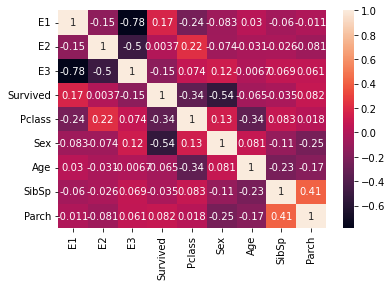

In [21]:
columns = ['E1', 'E2', 'E3', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
df = pd.DataFrame(x, columns=columns)
df = df.astype(float)
corr = df.corr()
sns.heatmap(corr, annot=True)

In [22]:
x = dataset[['Sex']].values

In [23]:
le = LabelEncoder()
x[:, -1] = np.array(le.fit_transform(x[:, -1]))

## Splitting into training set and test set

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

## Training the model

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

## Testing the model

In [26]:
y_pred = np.round_(regressor.predict(x_test))
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 0.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 

## Accuracy score

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7802690582959642